**Handwritten digits classification using neural network**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


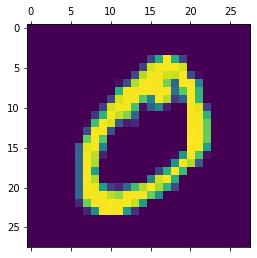

In [4]:
plt.matshow(X_train[1])

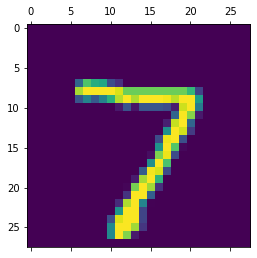

In [5]:
plt.matshow(X_test[0])

In [6]:
X_train = X_train / 255
X_test = X_test / 255

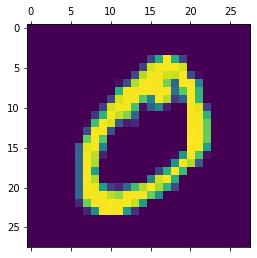

In [8]:
plt.matshow(X_train[1])

In [9]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [11]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


In [13]:
X_train_flat.shape

(60000, 784)

In [18]:
from keras.layers import InputLayer, Dense
model = keras.Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(units=10, activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4731 - accuracy: 0.8750
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2839 - accuracy: 0.9198
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2741 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9252


In [19]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2706 - accuracy: 0.9251


[0.27060389518737793, 0.9251000285148621]

In [20]:
pred=model.predict(X_test_flat)
print(np.argmax(pred[0]))
print(y_test[0])

7
7


In [21]:
pred_ans=[np.argmax(i) for i in pred]
print(pred_ans[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


Using 10 epochs.

In [22]:
model.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9283
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9293
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9301
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2510 - accuracy: 0.9300
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9310
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2471 - accuracy: 0.9320
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9317
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2449 - accuracy: 0.9331
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.243

In [23]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.9256


[0.2707207202911377, 0.925599992275238]

Using hidden layer

In [24]:
model=keras.Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(units=100, activation='tanh'))
model.add(Dense(units=10, activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2939 - accuracy: 0.9164
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1419 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1001 - accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0758 - accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0365 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0294 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0243 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [25]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0805 - accuracy: 0.9766


[0.0804857611656189, 0.9765999913215637]

Using Flatten layer

In [28]:
model=keras.Sequential()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2926 - accuracy: 0.9158
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1430 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0998 - accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9778
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0574 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0296 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.019

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9739


[0.08082852512598038, 0.9739000201225281]